In [2]:
# For computations
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# For random number generation
from numpy.random import seed
from numpy.random import rand

# For fitting of regression line
# For univariate regression
from scipy import stats
# For multivariate regression
import statsmodels.api as sm
import statsmodels.formula.api as smf

import re



In [4]:
data_labels = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]
auto_data = pd.read_csv('auto-mpg.data', delim_whitespace= True, names = data_labels)

auto_data.head()





,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [5]:
auto_data.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
item = auto_data.horsepower[2]
type(item)

str

Text(0.5, 1.0, 'Model_Year')

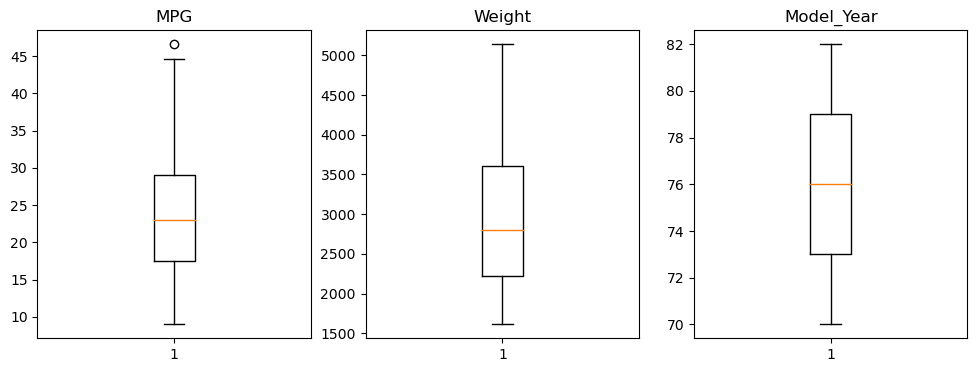

In [7]:
plt.rcParams["figure.figsize"] = [12, 4]

fig, axs = plt.subplots(1,3)


axs[0].boxplot(auto_data.mpg)
axs[0].set_title('MPG')
axs[1].boxplot(auto_data.weight)
axs[1].set_title('Weight')
axs[2].boxplot(auto_data.model_year)
axs[2].set_title('Model_Year')




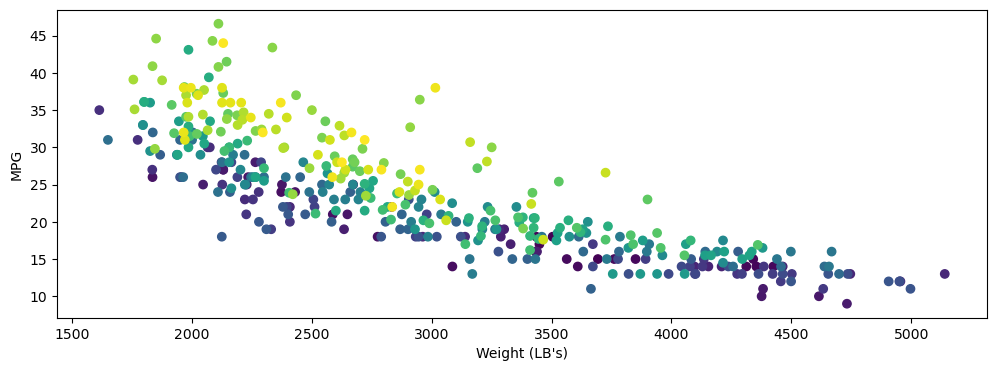

In [8]:
t = np.arange(len(auto_data.mpg))
plt.xlabel("Weight (LB's)")
plt.ylabel("MPG")
weight_mpg_scatter = matplotlib.pyplot.scatter(x = auto_data.weight, y = auto_data.mpg, c=t, )


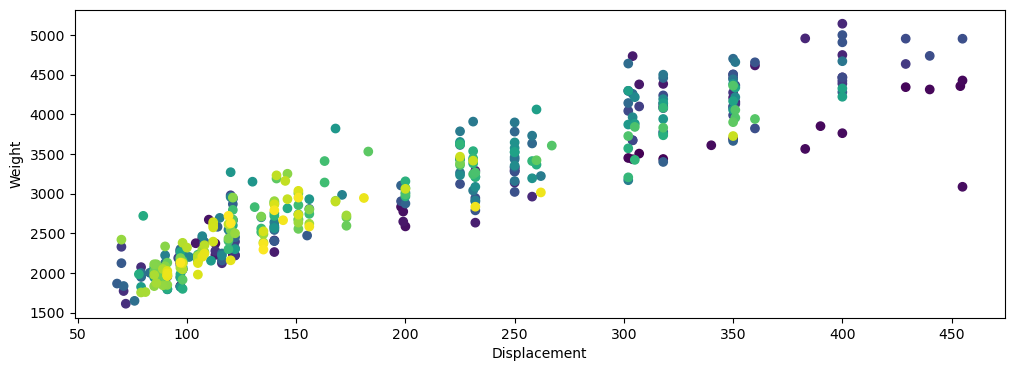

In [9]:
t = np.arange(len(auto_data.mpg))
plt.xlabel("Displacement")
plt.ylabel("Weight")
weight_mpg_scatter = matplotlib.pyplot.scatter(x = auto_data.displacement, y = auto_data.weight, c=t, )

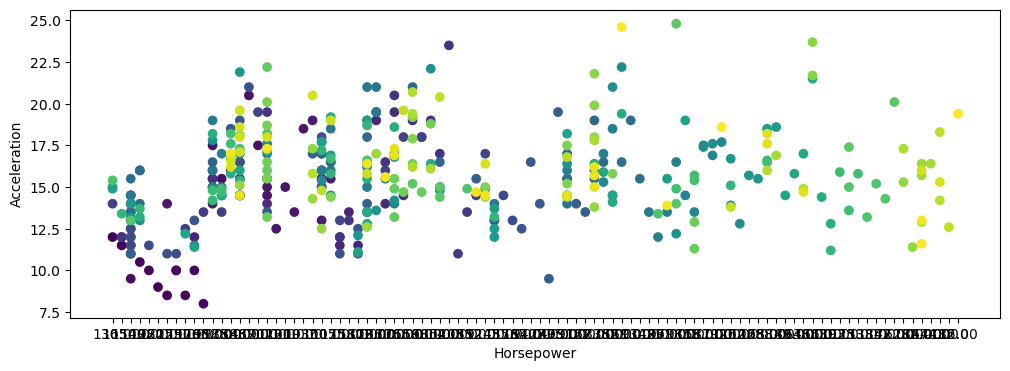

In [10]:
t = np.arange(len(auto_data.mpg))
plt.xlabel("Horsepower")
plt.ylabel("Acceleration")
weight_mpg_scatter = matplotlib.pyplot.scatter(x = auto_data.horsepower, y = auto_data.acceleration, c=t, )

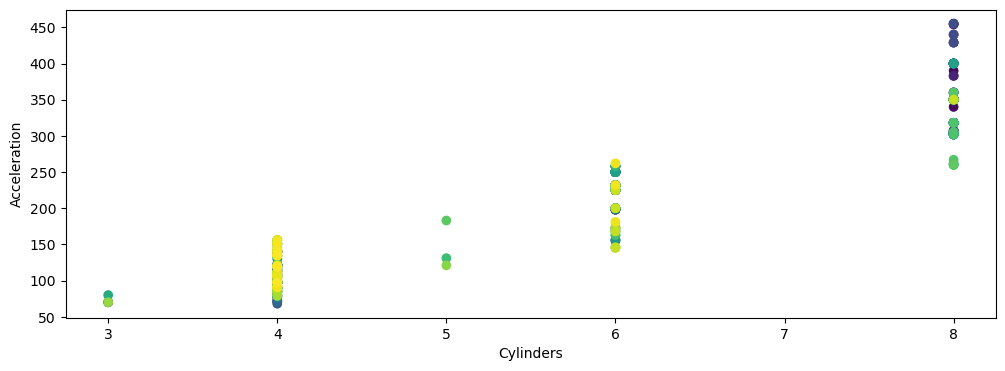

In [11]:
t = np.arange(len(auto_data.mpg))
plt.xlabel("Cylinders")
plt.ylabel("Acceleration")
weight_mpg_scatter = matplotlib.pyplot.scatter(x = auto_data.cylinders, y = auto_data.displacement, c=t, )

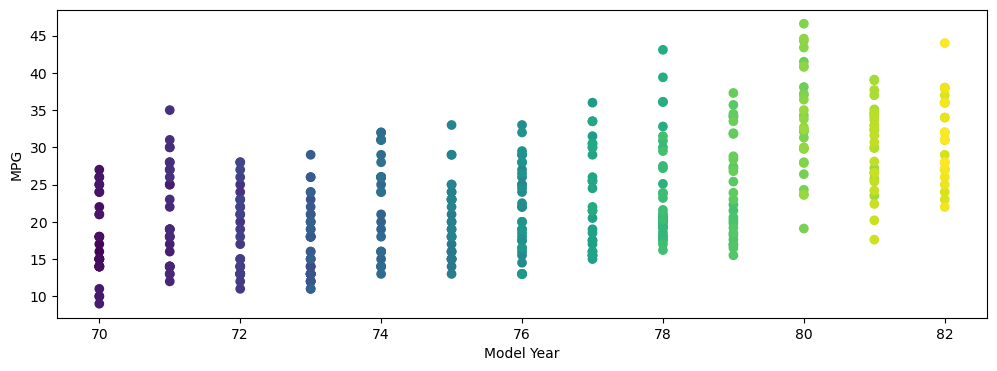

In [12]:
t = np.arange(len(auto_data.mpg))
plt.xlabel("Model Year")
plt.ylabel("MPG")
weight_mpg_scatter = matplotlib.pyplot.scatter(x = auto_data.model_year, y = auto_data.mpg, c=t, )

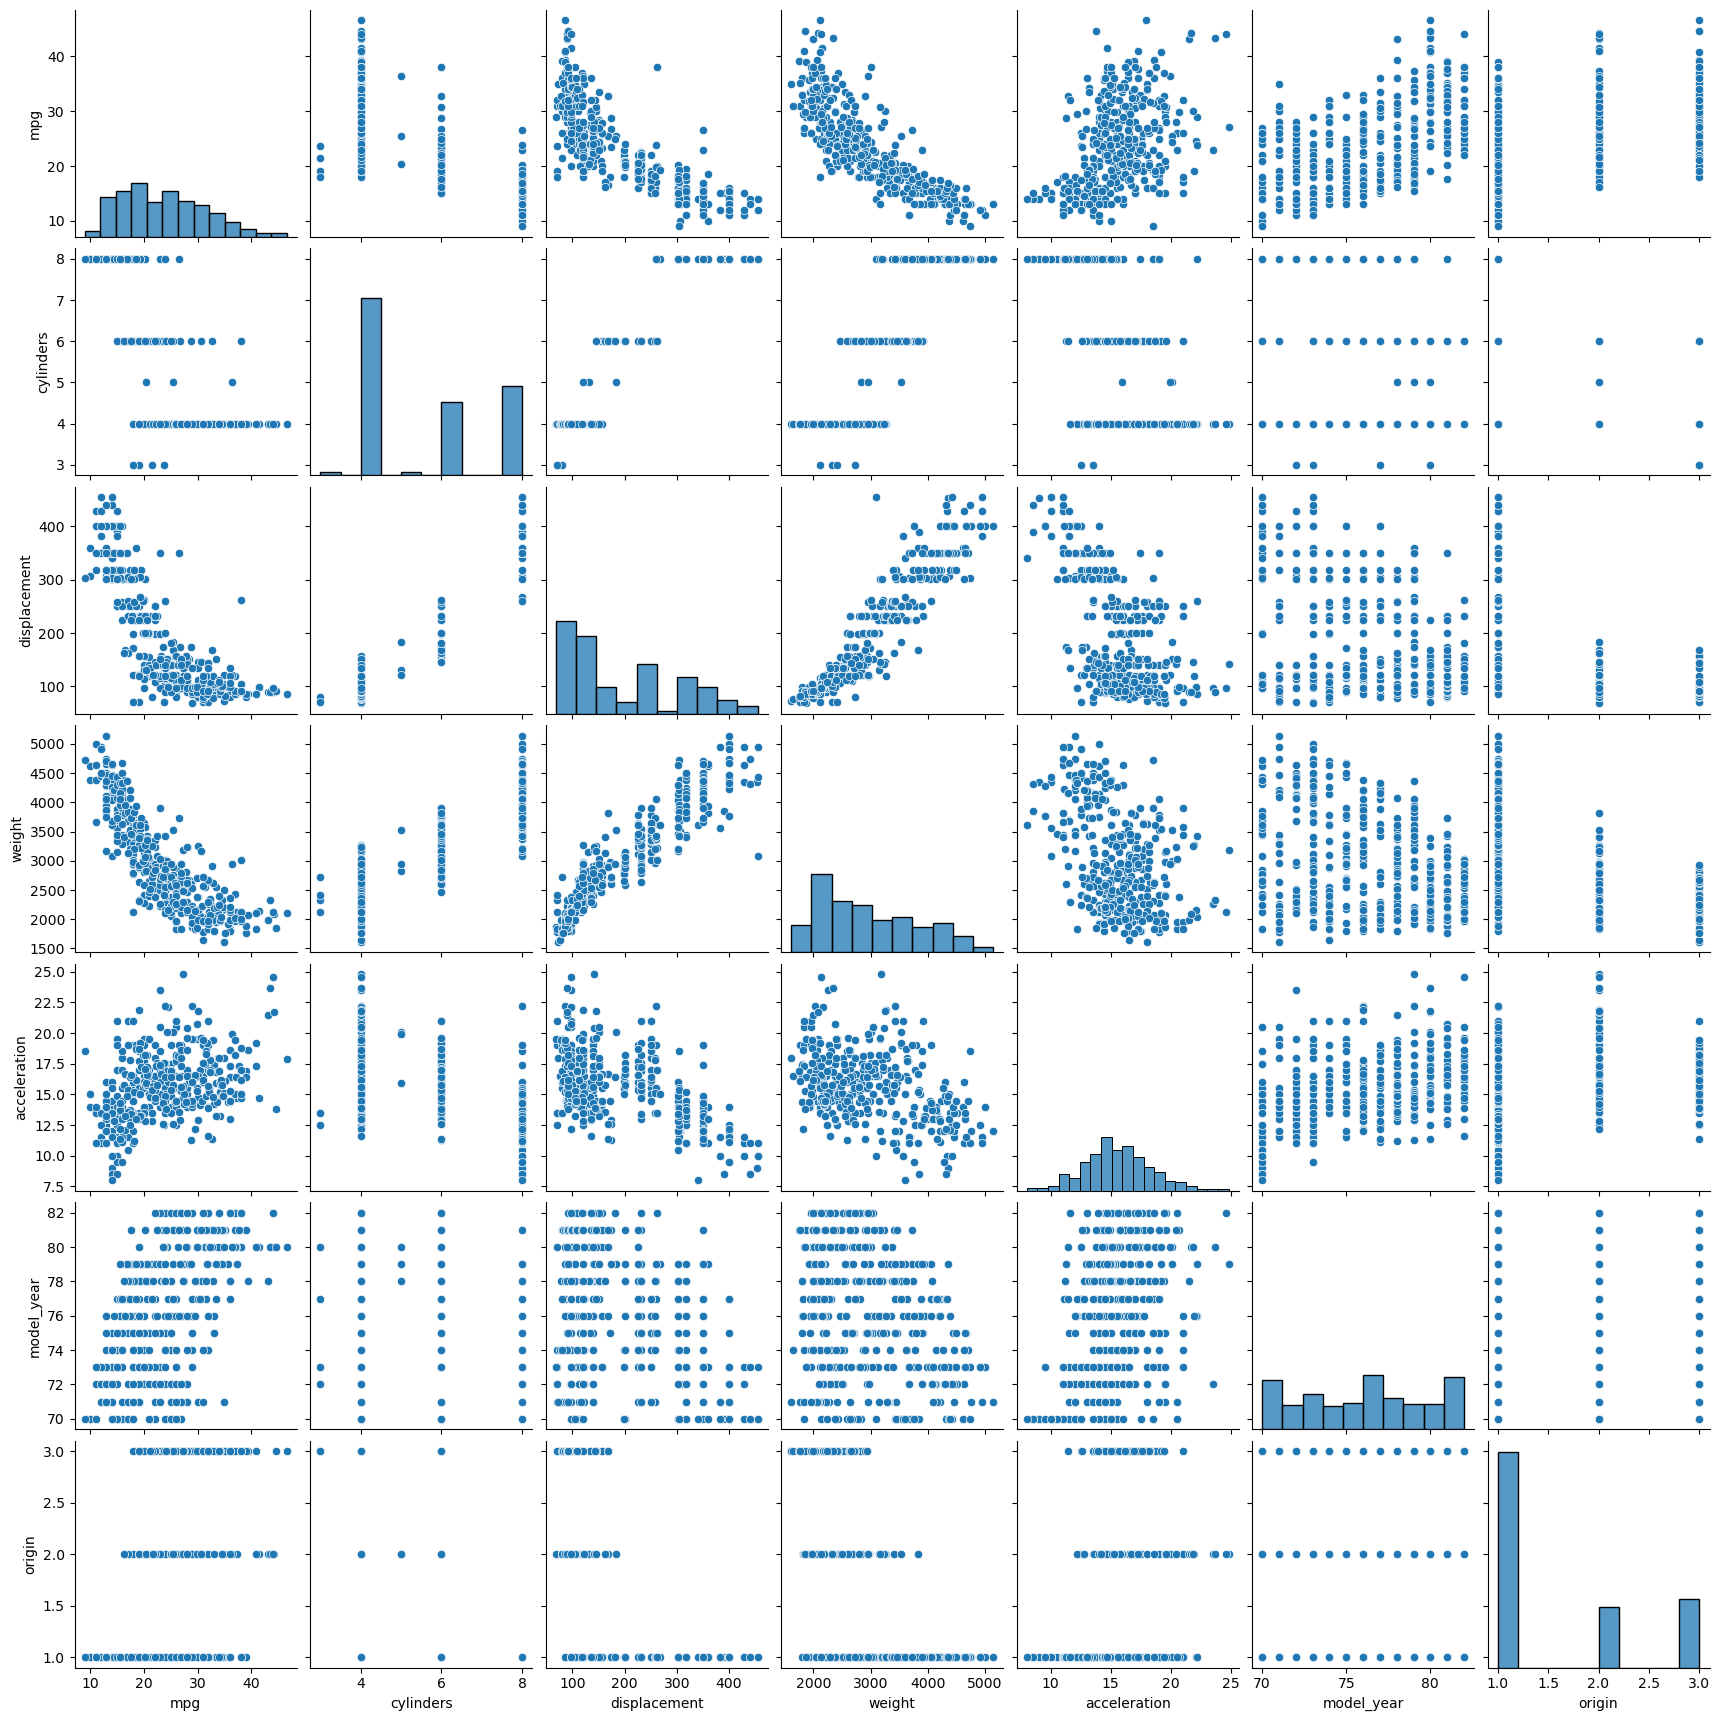

In [13]:
sns.pairplot(auto_data)

-0.007676610063926467 46.31736442026563 0.6917929800341577 2.9727995640493384e-103 0.0002574868628078228


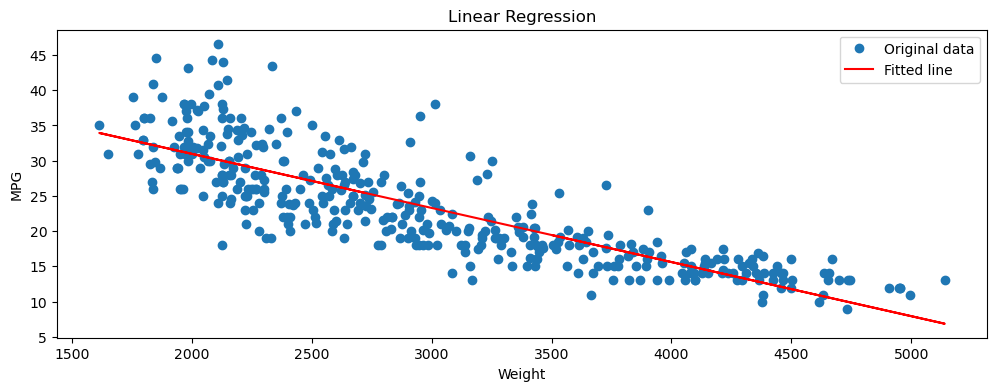

In [31]:
slope, intercept, r_value, p_value, std_err = stats.linregress(auto_data['weight'], auto_data['mpg'])
print(slope, intercept, r_value**2, p_value, std_err)
plt.plot(auto_data['weight'], auto_data['mpg'], 'o', label='Original data')
plt.plot(auto_data['weight'], intercept + slope*(auto_data['weight']), 'r', label='Fitted line')
plt.title("Linear Regression")
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.legend()
plt.grid(False)
plt.show()

In [21]:
results = smf.ols('weight ~ mpg', data= auto_data).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Mon, 22 May 2023   Prob (F-statistic):          2.97e-103
Time:                        14:41:59   Log-Likelihood:                -3013.1
No. Observations:                 398   AIC:                             6030.
Df Residuals:                     396   BIC:                             6038.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5089.4871     74.891     67.958      0.0

           10             9             8             7             6
8.649e-31 x  - 2.933e-26 x + 4.413e-22 x - 3.874e-18 x + 2.196e-14 x
              5            4             3          2
 - 8.396e-11 x + 2.19e-07 x - 0.0003844 x + 0.4344 x - 285.2 x + 8.259e+04


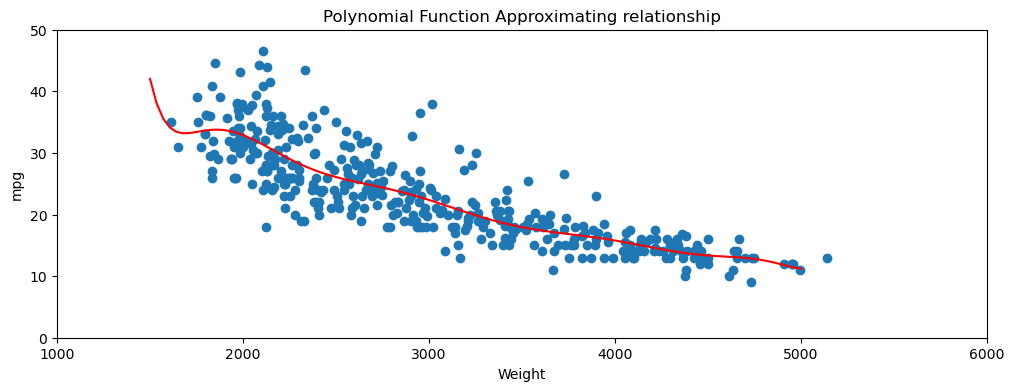

In [34]:
wMpg = np.polyfit(auto_data['weight'], auto_data['mpg'], 10)
wMpgEq = np.poly1d(wMpg)
#print(wMpgEq)
xp = np.linspace(1500, 5000, 100)
plt.plot(auto_data['weight'], auto_data['mpg'], 'o', xp, wMpgEq(xp), 'r-')
plt.xlabel("Weight")
plt.ylabel("mpg")
plt.title("Polynomial Function Approximating relationship")
plt.grid(False)
plt.ylim(0,50)
plt.xlim(1000,6000)
plt.show()
